# Continuous Lifetime Distributions

The continues empirical lifetime distribution can be evaluated by the theoretical lifetime ditribution, which follows a continous phase-type distribution. This type of distribution is given by;

$F_{T}(t) = 1 - p_{0}\exp(Q_{s}t)1$

$p_{0}$ is the probability of states $1,2,3,4$ at $t=0$. $Qs$ is a $4x4$ submatrix of Q, containing all Q execpt for the last row and column. $ps$ is a column vector with the probabilities of dying at state $1,2,3,4$. And 1 ia a vector of ones.

The empirical lifetimes are estimated by the code generated in task 7.

In [1]:
# Initialization
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
Q = np.array([[-0.0085, 0.005, 0.0025, 0, 0.001],
              [0, -0.014, 0.005, 0.004, 0.005], 
              [0, 0, -0.008, 0.003, 0.005],
              [0, 0, 0, -0.009, 0.009],
              [0, 0, 0, 0, 0]])

max_state = 5
n_women = 1000
women_states = np.ones(n_women)
lifetime = np.zeros(n_women)
states = np.arange(1,max_state+1)
time_until_next_state = np.random.exponential(scale = 1/-Q[0][0], size = n_women)

#plt.hist(time_until_next_state)
#print(time_until_next_state)# 


while np.min(women_states) < max_state:
# Get all individuals with state less than five (alive)
    women_alive_index = np.where(women_states < 5)[0]

    # Decide next event

    # Get minimum time until next state, only based on individuals alive
    time_min = np.min(time_until_next_state[women_alive_index])
    time_min_index = np.where((time_until_next_state == time_min))[0]
    time_until_next_state[women_alive_index] = time_until_next_state[women_alive_index] - time_min

    # Update states
    for elem in time_min_index:
        current_state = int(women_states[elem])
        probs = -Q[current_state-1,current_state:]/Q[current_state-1,current_state-1]
        new_state = np.random.choice(states[current_state:], p = probs)
        women_states[elem] = new_state
        
        # Update time only if state is not 5
        if new_state < 5: 
            time_until_next_state[elem] = np.random.exponential(scale = 1/-Q[new_state-1][new_state-1])

    # Update liftime
    lifetime[women_alive_index] += time_min

    #print("State:\t\t", women_states, )
    #print("Lifetime:\t",lifetime)
    #print("\n")


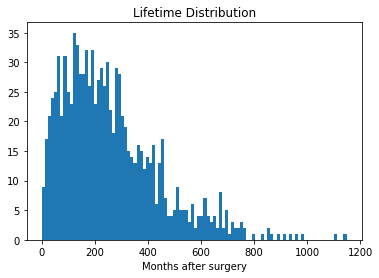

In [3]:
# Illustrate distribution of lifetime
plt.figure()
plt.title("Lifetime Distribution")
plt.xlabel("Months after surgery")
plt.hist(lifetime, bins = 100)
plt.show()

The probability is calculated by the equation stated above

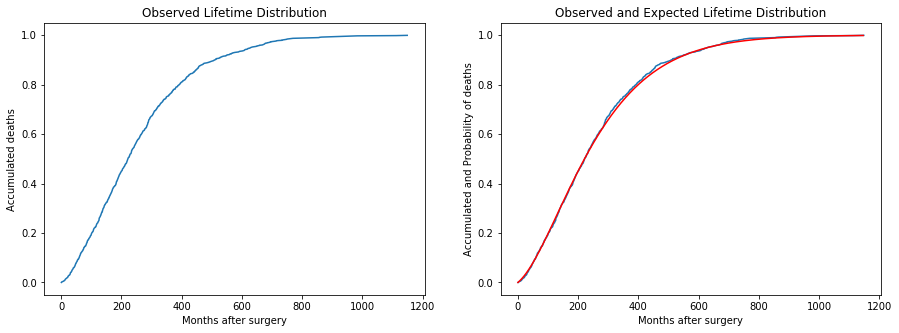

In [4]:
import scipy
from numpy.linalg import matrix_power

# Frequency of observed lifetimes 
lifetime_freq = np.sort(lifetime/np.arange(len(lifetime))/n_women)

# Probability of limetimes
# Sub matrix of P
Qs = Q[:-1,:-1]
# The probability distribution of  
p0 = np.array([1, 0, 0, 0])
# A vector of ones 
ones_vector = np.ones(len(p0))

# Computing the probability 
F_T = np.zeros(int(max(lifetime)))
for i in range(int(max(lifetime))):
    F_T[i] = 1 - (p0 @ scipy.linalg.expm((Qs * i)) @ ones_vector)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(np.sort(lifetime), np.arange(len(lifetime))/n_women)
#, np.arange(len(lifetime))/n_women)
plt.title("Observed Lifetime Distribution")
plt.xlabel("Months after surgery")
plt.ylabel("Accumulated deaths")
plt.subplot(122)
plt.plot(np.sort(lifetime), np.arange(len(lifetime))/n_women)
plt.plot(F_T, 'r')
plt.title("Observed and Expected Lifetime Distribution")
plt.xlabel("Months after surgery")
plt.ylabel("Accumulated and Probability of deaths")
plt.show()

In [6]:
from scipy.stats import chisquare

F_T = np.zeros(n_women)
for i in range(n_women):
    F_T[i] = 1 - (p0 @ scipy.linalg.expm((Qs * i)) @ ones_vector)

p_value = chisquare(((np.sort(lifetime)/np.arange(len(lifetime)))[1:]/n_women), F_T[1:])[1]
print('p-value for the chi squared test:   ', p_value)
print('')

D_kolomogorov = max(abs(np.sort(lifetime)/np.arange(len(lifetime)))[1:]-F_T[1:])
n = len(F_T[1:])
D_adj = D_kolomogorov*(np.sqrt(n)+0.12+0.11/np.sqrt(n))

print('D_ks ' + str(D_kolomogorov))
print('D adjusted:   ', str(D_adj))

p-value for the chi squared test:    0.9999999999403707

D_ks 1.678875026214075
D adjusted:    53.27144581272321


As seen by the presented plots above it seems that the observed continous lifetime distribution does indeed followthe expedted continous lifetime distribution. However this assumption is further examined by a Chi-square test and Kolmogorov Smirnov test. 

Comon for these two statistical tests is that their null hypothesis is that the two sets of samples are drawn from the same distribution.

The null hypothesis can not be rejected for either test at significance levels at 1%, indicating and further verifying that the observed lifetimes are indeed drawn from the continous phase-type distribution stated above.